<a href="https://colab.research.google.com/github/Mfeni/Pandas-Geo/blob/main/P_4_Ntbk1_Overlays(Union).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import geopandas as gp
from shapely.geometry import Polygon
from shapely.geometry import Point
from geopandas import datasets, GeoDataFrame, read_file
from geopandas.tools import overlay

In [ ]:
polys1 = gp.GeoSeries([Polygon([(0,0), (2,0), (2,2), (0,2)]),
                              Polygon([(2,2), (4,2), (4,4), (2,4)])])
polys2 = gp.GeoSeries([Polygon([(1,1), (3,1), (3,3), (1,3)]),
                              Polygon([(3,3), (5,3), (5,5), (3,5)])])
df1 = gp.GeoDataFrame({'geometry': polys1, 'df1':[1,2]})
df2 = gp.GeoDataFrame({'geometry': polys2, 'df2':[1,2]})

In [ ]:
df1

,geometry,df1
0,"POLYGON ((0 0, 2 0, 2 2, 0 2, 0 0))",1
1,"POLYGON ((2 2, 4 2, 4 4, 2 4, 2 2))",2


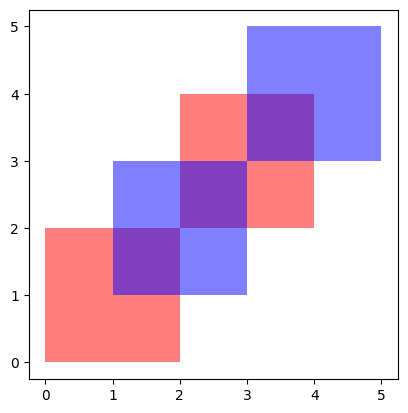

In [ ]:
ax = df1.plot(color='red', alpha=.5);
df2.plot(ax=ax, color='blue', alpha=0.5);

In [ ]:
union = df1.overlay(df2, how='union')
union

,df1,df2,geometry
0,1.0,1.0,"POLYGON ((2 2, 2 1, 1 1, 1 2, 2 2))"
1,2.0,1.0,"POLYGON ((2 2, 2 3, 3 3, 3 2, 2 2))"
2,2.0,2.0,"POLYGON ((4 4, 4 3, 3 3, 3 4, 4 4))"
3,1.0,NaN,"POLYGON ((2 0, 0 0, 0 2, 1 2, 1 1, 2 1, 2 0))"
4,2.0,NaN,"MULTIPOLYGON (((3 4, 3 3, 2 3, 2 4, 3 4)), ((4..."
5,NaN,1.0,"MULTIPOLYGON (((2 3, 2 2, 1 2, 1 3, 2 3)), ((3..."
6,NaN,2.0,"POLYGON ((3 5, 5 5, 5 3, 4 3, 4 4, 3 4, 3 5))"


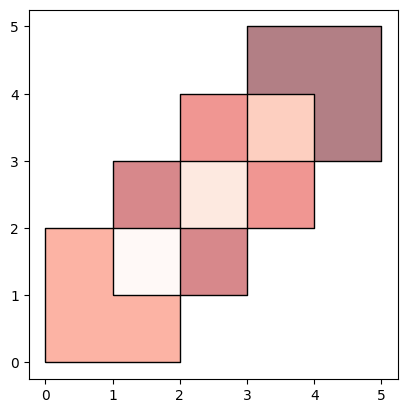

In [ ]:
ax = union.plot(alpha=0.5, cmap='Reds')
df1.plot(ax=ax, facecolor='none', edgecolor='k');#facecolor es color de relleno
df2.plot(ax=ax, facecolor='none', edgecolor='k');#edge color es el color del borde, 'k' es negro

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Diseño Cartográfico Phyton/Parte III. Pandas, GeoPandas/Pandas_DC/
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Diseño Cartográfico Phyton/Parte III. Pandas, GeoPandas/Pandas_DC
00ent.cpg  00ent.shp	      2023_1_24_MUN.shp    entidades.geojson	Nacional.dbf
00ent.dbf  00ent.shx	      2023_1_24_MUN.shx    gdf_inmigrantes.csv	Nacional.prj
00ent.prj  2023_1_24_MUN.cpg  denue_inegi_24_.csv  inmigrantes.geojson	Nacional.qmd
00ent.sbn  2023_1_24_MUN.dbf  df_inmigrantes.csv   Migracion.csv	Nacional.shp
00ent.sbx  2023_1_24_MUN.prj  df_repartos.csv	   Nacional.cpg		Nacional.shx


CRS: EPSG:4326


<Axes: >

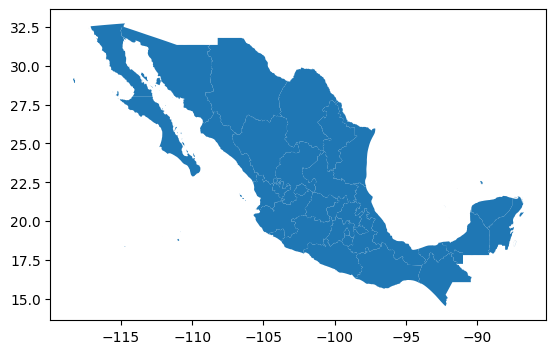

In [ ]:
nac_shp = gp.read_file("Nacional.shp")
print('CRS:' , nac_shp.crs)
nac_shp.plot()

**Ejemplo Overlays**

Unión

Text(78.97222222222221, 0.5, 'Latitud')

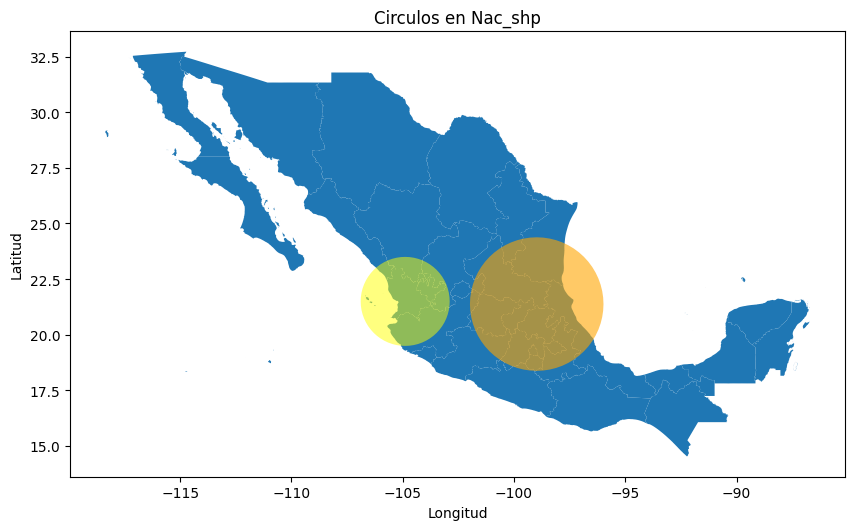

In [ ]:
# Crear puntos
center1 = Point(-98.98, 21.38) #Xilitla
center2 = Point(-104.89, 21.50)#Nayarit

# Crear DGF con los círculos
circle1 = gp.GeoDataFrame({'geometry': [center1.buffer(3)], 'id': [1]})
circle2 = gp.GeoDataFrame({'geometry': [center2.buffer(2)], 'id': [2]})

# Plot de los circulos en nac_shp
ax = nac_shp.plot(figsize=(10, 10))
circle1.plot(ax=ax, color='orange', alpha=0.6)
circle2.plot(ax=ax, color='yellow', alpha=0.5)

# Mostrar el plot
ax.set_title('Circulos en Nac_shp')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')


<ipython-input-87-33eecc45929b>:5: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  union_final = overlay(union_circulos, nac_shp, how='union')


Text(78.97222222222221, 0.5, 'Latitud')

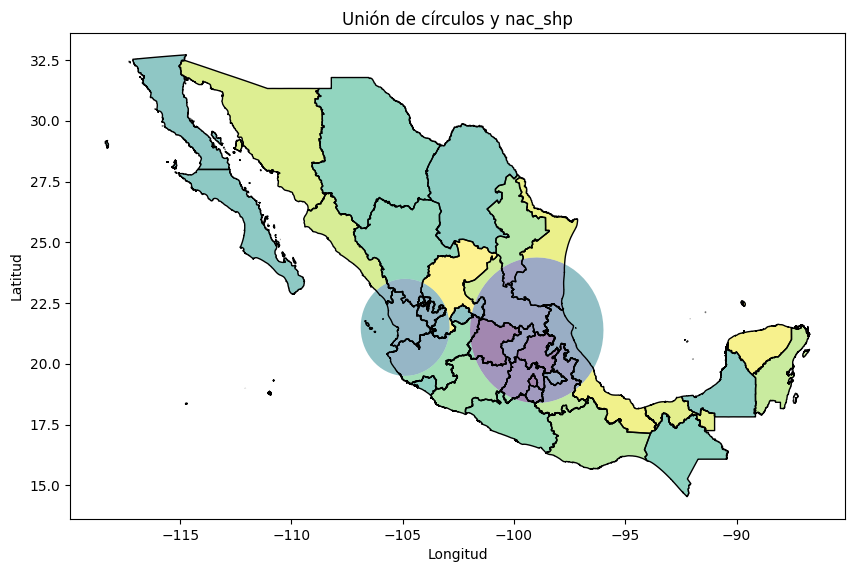

In [ ]:
# Unión de los círculos
union_circulos = overlay(circle1, circle2, how='union')

# Unión de la unión de los círculos con nac_shp
union_final = overlay(union_circulos, nac_shp, how='union')

# Plotear la unión de circulos unidos y nac_shp
ax = union_final.plot(figsize=(10, 10), alpha=0.5, cmap='viridis')
nac_shp.plot(ax=ax, facecolor='none', edgecolor='k')  # Agregar nac_shp al plot


# Personalizar el plot
ax.set_title('Unión de círculos y nac_shp')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')